In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# The Wald Test

We are given the statistical model $\left( \mathit{E}, \{ \mathbb{P}_\theta\}_{\theta \in \Theta} \right)$.  Let $\theta$ denote the true parameter of our distribution.  To build a Wald test we need an estimator for $\theta$, which we will call $\hat{\theta}$, where this estimator $\hat{\theta}$ satisfies

$$\frac{\hat{\theta} - \theta}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}\overset{(d)}{\underset{n \rightarrow \infty}{\to}} \mathcal{N}(0,1)$$

Where $\widehat{\text{var}}(\hat{\theta})$ is an estimator for the variance of $\hat{\theta}$.

For example if we have a family of Bernoulli distributions with true parameter $p$, then an estimator for $p$ is to take the sample mean, $\hat{p} = \overline{X}_n$.  What is the variance of $\hat{p}$?  We have seen that since the sum of Bernouli random variables is distributed as a Binomial random variable with parameters $n$ and $p$ then the variance is $\frac{p(1-p)}{n}$.  However this is not an estimator since it depends on our unknown parameter $p$.  How do we turn it into an estimator?  Put a hat on it.  Or more precicely, we replace the unknown parameter with an estimator for that parameter.  And the estimator that we will use is $\hat{p}$

$$\widehat{\text{var}}(\hat{p})= \frac{\hat{p}(1-\hat{p})}{n}$$

So if we substitute $\widehat{\text{var}}(\hat{p})$ into our estimator formula above, and by using the CLT and Slutsky's Lemma we have 

$$\frac{\hat{p} - p}{\sqrt{\widehat{\text{var}}(\hat{p})}}=\sqrt{n}\frac{\hat{p} -p}{\sqrt{\hat{p}(1-\hat{p})}}\overset{(d)}{\underset{n\to\infty}{\to}} \mathcal{N}(0,1)$$

Now, lets build the test more generaly.  We look at the following test statistic:

$$W := \frac{\hat{\theta} - \theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}$$

There are three cases to consider.  We can use this test statistic to see how far away our estimator $\widehat{\text{var}}(\hat{\theta})$ is from our true parameter $\theta_0$.  Or we could see if our test statistic is negative, in which case we have an estimator that is smaller than the true parameter, or we could see if our test statistic is positive, implying that our estimator is larger than the true parameter.

$$
\begin{array}{r|c|c|c}
&
\begin{array}{c}H_0: \theta = \theta_0 \\ H_1: \theta \ne \theta_0\end{array} &
\begin{array}{c}H_0: \theta \le \theta_0 \\ H_1: \theta \gt \theta_0\end{array} &
\begin{array}{c}H_0: \theta \ge \theta_0 \\ H_1: \theta \lt \theta_0\end{array} &   \\
\hline
\text{Wald Test: } \psi&\mathbb{1}\{|W|\gt q_{\alpha/2}\}&\mathbb{1}\{ W \gt q_\alpha\}&\mathbb{1}\{ W \lt q_\alpha\} \\
\end{array}
$$

So what values of $q_{\alpha/2}$ and  $q_\alpha$ do we use to get a desired level for the test?  We have suggestively written them like they were quantiles of a standard normal since we have asymtotic normality for our estimator, that makes sense.

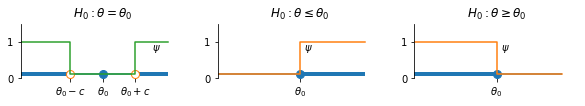

In [288]:
# set up the figure
fig, axs = plt.subplots(1,3, figsize=(10,1))
for ax in axs:
    ax.set_xlim(0,10)
    ax.set_ylim(0,1.5)

# name some important points on the line
xmin = 0
xmax = 9
y = 0.1
theta_0 = 5
c = 2
ms=8

# First Figure two sided test
# the fail to reject portion
axs[0].plot(theta_0,y,'o',ms=ms)
axs[0].hlines(y, theta_0 - c, theta_0 + c)
axs[0].plot([theta_0 -c,theta_0 + c],[y,y], 'o', ms=ms, mfc="w")

# make rejection region line heavier weight
axs[0].hlines(y,theta_0 + c, xmax, lw=4)
axs[0].hlines(y,xmin, theta_0 - c, lw=4)

# label our test function
axs[0].text(theta_0+3,0.75,"$\psi$")

# Plot our test function
x=[1,1,1,0.1,0.1,0.1,0.1,1,1,1]
axs[0].plot(x,drawstyle="steps-post",label="$\psi(X_1,...,X_n)$")

# Second Figure one sided test
# the fail to reject portion
axs[1].plot(theta_0,y,'o',ms=ms)
axs[1].hlines(y, xmin, theta_0)

# make rejection region line heavier weight
axs[1].hlines(y,theta_0, xmax, lw=4)

# label our test function
axs[1].text(theta_0+0.25,0.75,"$\psi$")

# Plot our test function
x=[0.1,0.1,0.1,0.1,0.1,1,1,1,1,1]
axs[1].plot(x,drawstyle="steps-post",label="$\psi(X_1,...,X_n)$")

# Third Figure one sided test
# the fail to reject portion
axs[2].plot(theta_0,y,'o',ms=ms)
axs[2].hlines(y,theta_0, xmax)

# make rejection region line heavier weight
axs[2].hlines(y,xmin, theta_0, lw=4, label="Rejection Region")

# label our test function
axs[2].text(theta_0+0.25,0.75,"$\psi$")

# Plot our test function
x=[1,1,1,1,1,0.1,0.1,0.1,0.1,0.1]
axs[2].plot(x,drawstyle="steps-post",label="$\psi(X_1,...,X_n)$")

axs[0].set_title(r"$H_0: \theta=\theta_0$")
axs[0].set_xticks(ticks=[theta_0-c,theta_0,theta_0+c])
axs[0].set_xticklabels([r'$\theta_0 - c$',r'$\theta_0$',r'$\theta_0+c$'])
axs[1].set_title(r"$H_0: \theta \leq \theta_0$")
axs[1].set_xticks(ticks=[theta_0])
axs[1].set_xticklabels([r'$\theta_0$'])
axs[2].set_title(r"$H_0: \theta \geq \theta_0$")
axs[2].set_xticks(ticks=[theta_0])
axs[2].set_xticklabels([r'$\theta_0$'])
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
#plt.axis('off')
#fig.legend()
plt.show()

## Asymtotic level of the Wald Test

We consider first the case of a two sided test.  Recall that the (asymptotic) level of a test is the largest value that the probability of making a type 1 error can take for that particular test, and it is usually denoted by $\alpha$ .  So if $\psi$ is our test, then that means we are looking for the largest value that $\mathbb{P}_\theta[\psi=1]$ can take when we look at all possible values of $\theta \in \Theta_0$. Since we are in the situation where we just have a simple hypothesis for $H_0: \theta = \theta_0$ that means we have only one value in $\Theta_0$, and that is $\theta_0$. Thus we can write this as:

$$\max \mathbb{P}_\theta[\psi=1] \le \alpha, \forall \theta \in \Theta_0 \equiv \mathbb{P}_{\theta_0}[\psi = 1]$$

We are interested in determining when we will reject the null hypothesis.  This is saying that if our test $\psi$ returns a value of $1$ under the null hypothesis on $\theta$ then we will reject the null hypothesis.  Stipulating that our test be done under the null hypothesis is an important and subtle point.  When we compute the value that our test is giving us we are doing so under the null hypothesis.  That is we are computing the value of the test based on the assumption that the true $\theta$ is as per our null hypothesis.  That is to say that in the two sided test we will be computing the value of our Wald's test with the assumption that $\theta = \theta_0$.  In the case of two sided tests, this does not present a hurdle to comuting the asymtotic level, but it does raise a small issue in the single sided tests as you will see below.

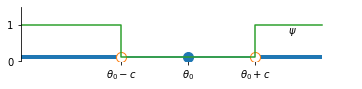

In [4]:
# set up the figure
fig, ax = plt.subplots(figsize=(6,1))
ax.set_xlim(0,10)
ax.set_ylim(0,1.5)

# name some important points on the line
xmin = 0
xmax = 9
y = 0.1
theta_0 = 5
c = 2

# the fail to reject portion
plt.plot(theta_0,y,'o',ms=10)
plt.hlines(y, theta_0 - c, theta_0 + c)
plt.plot([theta_0 -c,theta_0 + c],[y,y], 'o', ms=10, mfc="w")
#plt.plot(theta_0 - c,y, 'o', ms=10, mfc="w")

# make rejection region line heavier weight
plt.hlines(y,theta_0 + c, xmax, lw=4)
plt.hlines(y,xmin, theta_0 - c, lw=4)

# label our test function
plt.text(theta_0+3,0.75,"$\psi$")

# Plot our test function
x=[1,1,1,0.1,0.1,0.1,0.1,1,1,1]
plt.plot(x,drawstyle="steps-post",label="$\psi(X_1,...,X_n)$")

plt.xticks(ticks=[theta_0-c,theta_0,theta_0+c],labels=[r'$\theta_0 - c$',r'$\theta_0$',r'$\theta_0+c$'])
plt.plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#plt.axis('off')
plt.show()

Since we are looking at an asymtotitc level we consider

$$\underset{n\to \infty}{\lim}\mathbb{P}_{\theta_0}\left[ \psi = 1 \right]$$

If we substitute for $\psi$ the definition of the test we rewrite this as.

$$=\underset{n\to \infty}{\lim}\mathbb{P}_{\theta_0}\left[ |W| \gt q_{\alpha/2} \right]$$

As we saw above, by the Central Limit Theorem and Slutsky's Lemma we have that $W$ converges in distribution to $\mathcal{N}(0,1)$.  That is we have the following

$$
W=\frac{\hat{\theta}-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}\overset{(d)}{\underset{n \rightarrow \infty}{\to}} \mathcal{N}(0,1)
$$

What is this saying?  We define a test a test statistic for our estimated parameter $\hat{\theta}$ called $W$.  We create this statistic by centering on $\theta_0$ and rescale by dividing by the square root of the estimated variance of our estimator $\hat{\theta}$. Then in the limit the distribution of $W$ converges to a standard normal.

Now we can use the standard normal quantiles to bound the asymtotic level for our Wald Test.  Thus we get that

$$\underset{n\to \infty}{\lim}\mathbb{P}_{\theta_0}\left[ \psi = 1 \right] = \mathbb{P}\left[ |Z| \gt q_{\alpha/2} \right] = \alpha$$

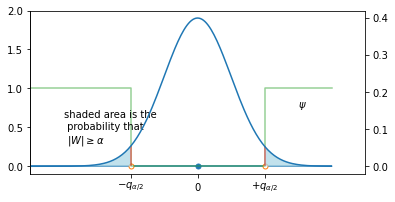

In [292]:

# set up the figure
fig, ax = plt.subplots(figsize=(6,3))
ax.set_xlim(0,10)
ax.set_ylim(-0.1,2)

# name some important points on the line
xmin = 0
xmax = 9
y = 0.1
theta_0 = 5
c = 2

# the fail to reject portion
plt.plot(theta_0,0,'o',ms=5)
plt.hlines(0, theta_0 - c, theta_0 + c)
plt.plot([theta_0 -c,theta_0 + c],[0,0], 'o', ms=5, mfc="w")
#plt.plot(theta_0 - c,y, 'o', ms=10, mfc="w")

# make rejection region line heavier weight
plt.hlines(0,theta_0 + c, xmax)
plt.hlines(0,xmin, theta_0 - c)

# label our test function
plt.text(theta_0+3,0.75,"$\psi$")

# Plot our test function
x=[1,1,1,0,0,0,0,1,1,1]
plt.plot(x,drawstyle="steps-post",label="$\psi(X_1,...,X_n)$", alpha=0.5)

plt.xticks(ticks=[theta_0-c,theta_0,theta_0+c],labels=[r'$-q_{\alpha/2}$',r'$0$',r'$+q_{\alpha/2}$'])
plt.plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#plt.axis('off')

# plot our normal dist with different y axis
# x values for the normal plot.
ax2 = ax.twinx()
x = np.linspace(xmin, xmax, 201)

#freeze a normal dist.
rv = norm(theta_0, 1)

# plot our normal function.
ax2.plot(x, rv.pdf(x), label='Normal Distribution\n scipy.stats.norm.pdf(x)')

ax2.vlines(x=[theta_0-c, theta_0+c], ymin=[0, 0], ymax=[rv.pdf(theta_0-c), rv.pdf(theta_0+c)], color='red', alpha=0.5)
x_left=np.linspace(xmin,theta_0-c,201)
x_right=np.linspace(theta_0+c,xmax,201)
ax2.fill_between(x_left, rv.pdf(x_left), alpha=0.75, facecolor='lightblue')
ax2.fill_between(x_right, rv.pdf(x_right), alpha=0.75, facecolor='lightblue')
ax.text(1,0.3,"shaded area is the \n probability that\n $|W| \geq \\alpha$ ")
plt.axis('on')
#ax.legend()

plt.show()

We can carry out a similar analysis for the other cases.  Let's look at the one sided test based on the hypotheses

$$
H_0: \theta \le \theta_0 \\ H_1: \theta \gt \theta_0
$$

So what are we looking to control?  Since we are looking to control the type 1 error rate we want to have that for any $\theta \le \theta_0$ we can find a bound on the following limit:

$$\underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ \psi = 1 \right] = \underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ W \gt q_{\alpha} \right] = \underset{n\to \infty}{\lim}\mathbb{P}_{\theta} \left[ \frac{\hat{\theta}-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}\gt q_\alpha \right]$$

Where the reasoning is just as above: we want an asymptotic result, so we are takinng the limit as $n$ goes to $\infty$ for our test.  That is the first expression in our chain of equalities.  Next we are substituting in the definition of our test $\psi$. That is the second expression.  The third expression is just writing this out fully with the definition of our test statistic $W$.  Now, we would like that limit to converge to $\alpha$ however we want that convergence to be true for all possible $\theta$ that are in the null hypothesis region. Right now we have an expression that is calculating a probability for some $\theta \in (-\infty, \theta_0)=\Theta_0$, but our estimator is only telling us asymtotic results relative to one value in $\Theta_0$, $\theta_0$. What we want is for the limit to converge for all $\theta \in \Theta_0$. Let's work on that.

If we chose some $\theta \lt \theta_0$ then we can rewrite our $W$ statistic as

$$\frac{\hat{\theta}-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}=\frac{\hat{\theta}-\theta}{\sqrt{\widehat{\text{var}}(\hat{\theta})}} + \frac{\theta-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}$$

then the second term above will always be negative and thus we can transform our equality above into an inequality if we just look at the first term.

$$\frac{\hat{\theta}-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}\le\frac{\hat{\theta}-\theta}{\sqrt{\widehat{\text{var}}(\hat{\theta})}} $$

$$\underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ \psi = 1 \right] \le \underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[\frac{\hat{\theta}-\theta}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}\gt q_\alpha \right]$$

Where now we do not have an equality but an inequality since we are looking at something that is at least as large as what we previously had.  As we have seen the right hand side converges to a standard normal.  Thus we can write

$$\underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ \psi = 1 \right] \le \mathbb{P}_{\theta}\left[ Z \gt q_\alpha \right] = \alpha$$

where $Z \sim \mathcal{N}(0,1)$

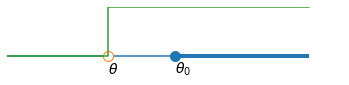

In [88]:
# set up the figure
fig, ax = plt.subplots(figsize=(6,1))
ax.set_xlim(0,10)
ax.set_ylim(-0.1,1)

# name some important points on the line
xmin = 0
xmax = 9
y = 0
theta = 3
theta_0 = 5

# the fail to reject portion
plt.plot(theta_0,y,'o',ms=10)
plt.hlines(y, xmin, theta_0)
plt.plot(theta,y, 'o', ms=10, mfc="w")
#plt.plot(theta_0 - c,y, 'o', ms=10, mfc="w")

# make rejection region line heavier weight
plt.hlines(y,theta_0, xmax, lw=4)

# label our parameter theta_0 and c
plt.text(theta, y-0.35, r'$\theta$', fontsize=14)
plt.text(theta_0, y-0.35, r'$\theta_0$', fontsize=14)
#plt.text(theta_0+3,0.75,"$\psi$")

# Plot our test function
x=[0,0,0,1,1,1,1,1,1,1]
plt.plot(x,drawstyle="steps-post",label="$\psi(X_1,...,X_n)$")

plt.plot
plt.axis('off')
plt.show()

The argument for the third type of test where our null hypothesis is that $\theta$ exceeds some value $\theta_0$ is exactly the same.  The only change is that when we look at 

$$\frac{\hat{\theta}-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}=\frac{\hat{\theta}-\theta}{\sqrt{\widehat{\text{var}}(\hat{\theta})}} + \frac{\theta-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}$$
we see that since $\theta \gt \theta_0$ then $\theta - \theta_0 \gt 0$ and hence our inequalities are reversed.

So if 

$$H_0: \theta \ge \theta_0 \\ H_1: \theta \lt \theta_0$$

That is we want to bound the following limit:

$$\underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ \psi = 1 \right] = \underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ W \lt q_{\alpha} \right] = \underset{n\to \infty}{\lim}\mathbb{P}_{\theta} \left[ \frac{\hat{\theta}-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}\lt q_\alpha \right]$$


If we rewrite our $W$ statistic as

$$\frac{\hat{\theta}-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}=\frac{\hat{\theta}-\theta}{\sqrt{\widehat{\text{var}}(\hat{\theta})}} + \frac{\theta-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}$$

where $\theta \gt \theta_0$ then the second term above will always be positive and thus if we just look at the first term we see that

$$\underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ \psi = 1 \right] \ge \underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[\frac{\hat{\theta}-\theta}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}\lt q_\alpha \right]$$

Where now we do not have an equality but an inequality and we have that the right hand side converges to a standard normal.  Thus we can write

$$\underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ \psi = 1 \right] \ge \mathbb{P}_{\theta}\left[ Z \lt q_\alpha \right] = \alpha$$

where $Z \sim \mathcal{N}(0,1)$

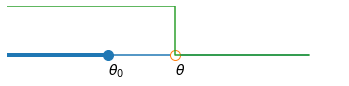

In [49]:
# set up the figure
fig, ax = plt.subplots(figsize=(6,1))
ax.set_xlim(0,10)
ax.set_ylim(0,1)

# name some important points on the line
xmin = 0
xmax = 9
y = 0.1
theta = 5
theta_0 = 3

# the fail to reject portion
plt.plot(theta_0,y,'o',ms=10)
plt.hlines(y, theta_0, xmax)
plt.plot(theta,y, 'o', ms=10, mfc="w")
#plt.plot(theta_0 - c,y, 'o', ms=10, mfc="w")

# make rejection region line heavier weight
plt.hlines(y,xmin, theta_0, lw=4)

# label our parameter theta_0 and c
plt.text(theta, y-0.35, r'$\theta$', fontsize=14)
plt.text(theta_0, y-0.35, r'$\theta_0$', fontsize=14)
#plt.text(theta_0+3,0.75,"$\psi$")

# Plot our test function
x=[1,1,1,1,1,0.1,0.1,0.1,0.1,0.1]
plt.plot(x,drawstyle="steps-post",label="$\psi(X_1,...,X_n)$")

plt.plot
plt.axis('off')
plt.show()

we see that since $\theta \gt \theta_0$ then $\theta - \theta_0 \gt 0$ and hence our inequalities are reversed.

So if 

$$H_0: \theta \ge \theta_0 \\ H_1: \theta \lt \theta_0$$

That is we want to bound the following limit:

$$\underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ \psi = 1 \right] = \underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ W \lt q_{\alpha} \right] = \underset{n\to \infty}{\lim}\mathbb{P}_{\theta} \left[ \frac{\hat{\theta}-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}\lt q_\alpha \right]$$


If we rewrite our $W$ statistic as

$$\frac{\hat{\theta}-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}=\frac{\hat{\theta}-\theta}{\sqrt{\widehat{\text{var}}(\hat{\theta})}} + \frac{\theta-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}$$

where $\theta \gt \theta_0$ then the second term above will always be positive and thus if we just look at the first term we see that

$$\underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ \psi = 1 \right] \ge \underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[\frac{\hat{\theta}-\theta}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}\lt q_\alpha \right]$$

Where now we do not have an equality but an inequality and we have that the right hand side converges to a standard normal.  Thus we can write

$$\underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ \psi = 1 \right] \ge \mathbb{P}_{\theta}\left[ Z \lt q_\alpha \right] = \alpha$$

where $Z \sim \mathcal{N}(0,1)$

### The p-value of the Wald Test

The setup is as follows:  We have a statement that "more than 2/3 of Americans get news on social media".  We want to test this statement.  The experiment we conduct is we sample the population and get $X_1,\dots,X_n$ independent samples to a yes/no question "Do you get some of your news on social media?".  Thus we have $n$ observations that are $\overset{\text{iid}}{\sim} \text{Ber}(p), p\in (0,1)$.  We set up our hypothesis as follows:

$$H_0: p \le 2/3$$
$$H_1: p \gt 2/3$$

Since what we are taking as the status quo AKA the null hypothesis is that less than 2/3 of Americans get their news on social media, and we are looking for evidence that this ratio is actually larger than 2/3. Suppose we have some data based on $n=4,581$ subjects that the estimator $\hat{p} = 0.68$  Notice that this value is larger than $2/3$ but we want to determine if it is statistically significant that it is larger than $2/3$.  That is we are asking the question: "what is the probability that what we have observed is not due to random fluctuations in our experimnet but rather the true mean is actually greater than $2/3$.

To assess this we are going to use the Wald statistic which we can calculate as:

$$W_{\text{obs}}=\sqrt{n}\frac{\hat{p}-p_0}{\sqrt{\hat{p}(1-\hat{p})}}=\sqrt{4,581}\left( \frac{0.68-2/3}{\sqrt{0.68(0.32)}}\right)=1.93$$

So, do we reject the null hypothesis or do we fail to reject the null hypothesis?  Since our Wald Statistic is asymptoticaly normal, and assuming a 5% level for our one sided test, our test statistic is larger than the 5% quantile of $\approx 1.645$ and that means that we should reject the null hypothesis based on our data.

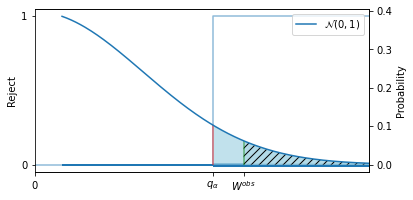

In [293]:
fig, ax = plt.subplots(figsize=(6,3))
xmin=norm.ppf(0.6)
xmax=norm.ppf(0.999)
ax.set_xlim(xmin,xmax)

plt.yticks(ticks=[0,1])
ax.set_ylabel("Reject")

# name some important points on the line
p_0 = 2/3
alpha = norm.ppf(0.95) # 5% level, one sided
w_observed = 1.93

# the fail to reject portion
plt.hlines(0,xmin,alpha, lw=2)
# make rejection region line heavier weight
plt.hlines(0, alpha, xmax, lw=4)

# Plot our test function
ax.step([0,alpha,xmax],[0,0,1],drawstyle="steps-post",label="$\psi(X_1,...,X_n)$", alpha=0.5)
# label our test function
#plt.text(1.1*alpha,0.9,"$\psi$")

# plot our normal dist with different y axis
# x values for the normal plot.
ax2 = ax.twinx()
x = np.linspace(xmin, xmax, 201)
ax2.plot(x, norm.pdf(x), label=('$\mathcal{N}(0,1)$'))
ax2.set_ylabel("Probability")

# mark the start of our rejection region
ax2.vlines(x=[alpha], ymin=[0], ymax=[norm.pdf(alpha)], color='red', alpha=0.5)
# shade the rejection region
x_right=np.linspace(alpha,xmax,201)
ax2.fill_between(x_right, norm.pdf(x_right), alpha=0.75, facecolor='lightblue')

# mark where our observed statistic lies.
ax2.vlines(x=[w_observed], ymin=[0], ymax=[norm.pdf(w_observed)], color='green', alpha=0.5)
# hatch the p-value
x_hatch=np.linspace(w_observed,xmax,201)
ax2.fill_between(x_hatch, norm.pdf(x_hatch),alpha=0.75, facecolor='lightblue', hatch='///')

plt.xticks(ticks=[0,alpha, w_observed],labels=[r'$0$',r'$q_{\alpha}$',r"$W^{obs}$"])

plt.axis('on')
ax.spines['left'].set_visible(False)
plt.legend()

plt.show()

Now, what is the asymptotic p-value for this test?  By definition it is the smallest level $\alpha$ for which I will reject the null hypothesis under this test.  To compute this we can do the following:

In [180]:
p_value=(1-norm.cdf(1.93))
print('the p-value is approx.: %.4f ' %p_value)

the p-value is approx.: 0.0268 


So what is this telling us?  For one thing it tells us that we will fail to reject the null hypothesis if we are testing at asymptotic level $1\%$ and at level $2\%$.  It also tells us that based on our evidence scale we have strong evidence that the true proportion of people who get their news on social media is at least $2/3$.

Also notice that what if we were to know the actual distribution of the Wald statistic, then the p-value is just the probability that the test statistic is larger than what we observed:  $\mathbb{P}_{\theta_0}(|W|\gt W^{\text{obs}})$.  If we do not have in hand the distribution of our test statistic, then we can get asymptotic p-values from a Normal table.  We can summarize this by the following:

If we denote our test by

$$W:=\frac{\hat{\theta} - \theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}$$

and if we denote by $W^{\text{obs}}$ the observed value of our test statistic then p-values and asymptotic p-values are given by

$$
\begin{array}{r|c|c|c}
&
\begin{array}{c}H_0: \theta = \theta_0 \\ H_1: \theta \ne \theta_0\end{array} &
\begin{array}{c}H_0: \theta \le \theta_0 \\ H_1: \theta \gt \theta_0\end{array} &
\begin{array}{c}H_0: \theta \ge \theta_0 \\ H_1: \theta \lt \theta_0\end{array} &   \\
\hline
\text{Wald Test: } \psi&\mathbb{1}\{|W|\gt q_{\alpha/2}\}&\mathbb{1}\{ W \gt q_\alpha\}&\mathbb{1}\{ W \lt q_\alpha\} \\
\hline
\text{p-value}&\mathbb{P}(|W|\gt |W^{\text{obs}}|)&\mathbb{P}( W \gt W^{\text{obs}})&\mathbb{P}( W \lt W^{\text{obs}}) \\
\hline
\text{asymptotic p-value}&\mathbb{P}(|X|\gt |W^{\text{obs}}|)&\mathbb{P}(X \gt W^{\text{obs}})&\mathbb{P}( X \lt W^{\text{obs}}) \\
\end{array}
$$

where $X {\sim}\mathcal{N}(0,1)$

In many cases we will not have in hand the actual distribution of $W$, but we will have the asymptotic results. Here are a few examples of the calculations.

##### Examples:

In each of the following compute the p-value.

1) Let our hypotheses be:  

$$H_0: p\le 0.5$$
$$H_1: p \gt 0.5$$

With an observed value of our Wald Statistc $W^{\text{obs}}=1.72$

0.043


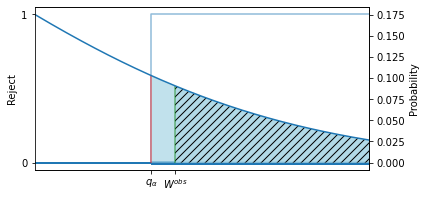

In [299]:
fig, ax = plt.subplots(figsize=(6,3))
xmin=norm.ppf(0.9)
xmax=norm.ppf(0.99)
ax.set_xlim(xmin,xmax)

plt.yticks(ticks=[0,1])
ax.set_ylabel("Reject")

# name some important points on the line
w_obs = 1.72
prob = (1 - norm.cdf(w_obs))
print("%.3f" %prob)
p_0 = 2/3
alpha = norm.ppf(0.95) # 5% level, one sided

# the fail to reject portion
plt.hlines(0,xmin,alpha, lw=2)
# make rejection region line heavier weight
plt.hlines(0, alpha, xmax, lw=4)

# Plot our test function
ax.step([0,alpha,xmax],[0,0,1],drawstyle="steps-post",label="$\psi(X_1,...,X_n)$", alpha=0.5)
# label our test function
#plt.text(1.1*alpha,0.9,"$\psi$")

# plot our normal dist with different y axis
# x values for the normal plot.
ax2 = ax.twinx()
x = np.linspace(xmin, xmax, 201)
ax2.plot(x, norm.pdf(x), label=('$\mathcal{N}(0,1)$'))
ax2.set_ylabel("Probability")

# mark the start of our rejection region
ax2.vlines(x=[alpha], ymin=[0], ymax=[norm.pdf(alpha)], color='red', alpha=0.5)
# shade the rejection region
x_right=np.linspace(alpha,xmax,201)
ax2.fill_between(x_right, norm.pdf(x_right), alpha=0.75, facecolor='lightblue')

# mark where our observed statistic lies.
ax2.vlines(x=[w_obs], ymin=[0], ymax=[norm.pdf(w_obs)], color='green', alpha=0.5)
# hatch the p-value
x_hatch=np.linspace(w_obs,xmax,201)
ax2.fill_between(x_hatch, norm.pdf(x_hatch),alpha=0.75, facecolor='lightblue', hatch='///')

plt.xticks(ticks=[alpha, w_obs],labels=[r'$q_{\alpha}$',r"$W^{obs}$"])

plt.axis('on')
ax.spines['left'].set_visible(False)
#plt.legend()

plt.show()


2) Let our hypoteses be:

$$H_0: p = 0.5$$
$$H_1: p \lt 0.5$$

With an observed value of our Wald Statistc $W^{\text{obs}}=-1.06$

In [114]:
w_obs = -1.06
prob = (norm.cdf(-abs(w_obs)))
print("%.3f" %prob)

0.145


3) Let our hypoteses be:

$$H_0: \theta \ge 2$$
$$H_1: \theta \lt 2$$

With an observed value of our Wald Statistc $W^{\text{obs}}=-2.14$

In [115]:
w_obs = -2.14
prob = (norm.cdf(w_obs))
print("%.3f" %prob)

0.016


4) Let our hypoteses be:

$$H_0: \theta \le 0$$
$$H_1: \theta \gt 0$$

With an observed value of our Wald Statistc $W^{\text{obs}}=0.07$

In [117]:
w_obs = 0.07
prob = 1 - (norm.cdf(w_obs))
print("%.3f" %prob)

0.472


5) Let our hypoteses be:

$$H_0: \lambda \ge 1$$
$$H_1: \lambda \lt 1$$

With an observed value of our Wald Statistc $W^{\text{obs}}=-3.07$

In [118]:
w_obs = -3.07
prob = norm.cdf(-abs(w_obs))
print("%.3f" %prob)

0.001


#### Kiss Example:
The set up is $X_1,\dots,X_n\overset{\text{iid}}{\sim}\text{Ber}(p)$.  We are testing

$$H_0: p = 0.5$$
$$H_1: p \ne 0.5$$

We observe 124 couples and observe $\bar{X}_n = 0.645$ What is the asymptotic p-value of the Wald test?

In [132]:
p_0=0.5
n = 124
x_bar_n = 0.645
w_obs = (n**0.5)*((x_bar_n - p_0)/((x_bar_n*(1-x_bar_n))**0.5))
print('W observed ~ %.3f' %w_obs)
prob = 2*(norm.cdf(-abs(w_obs)))
print("p-value ~ %.3f" %prob)

W observed ~ 3.374
p-value ~ 0.001


### Example 2:  How to board a plane?

There are a number of strategies that are possible for boarding a plane.  One method is to board from the rear of the aircraft to the front (R2F).  Another method is to board in order of window seats first, then middle seats, and finally aisle seats (WilMA).  The question is: "Is there a differnce in the boarding times?".

We begin by developing a statistical model.  Let $X$ denote the boarding time of a random R2F flight and let $Y$ denote the boarding time of a random WilMA flight.  We will be using the Wald test and by implication the Central Limit Theorem, so we only need to know the mean and standard deviation of those two different methods.

$$\mathbb{E}[X]=\mu_1, \text{var}[X]=\sigma^2_1$$
$$\mathbb{E}[Y]=\mu_2, \text{var}[Y]=\sigma^2_2$$

We collect samples for both types of boarding methods to get our data $X_1,\dots,X_n$ and $Y_1,\dots,Y_m$. And we futher assume that the samples are independent.

Our question is translated into a hypothesis statement where we use as the status quo, or null hypothesis, that there is no difference in mean boarding times:

$$H_0: \mu_1 = \mu_2$$
$$H_1: \mu_1 \ne \mu_2$$

We have not seen anything yet that would let us compare two means, but, since we have have assumed that the two samples are independen then we can take linear combinations of the two means and state the hypothesis in this form:

Let $\theta = \mu_1 - \mu_2$

$$H_0: \theta = 0$$
$$H_1: \theta \ne 0$$

We call this sort of a testing problem a _two sample_ testing problem.

What do we need to do to apply the Wald test?  We first need an estimator for our parameter of interest, $\theta$, that is asymptotically normal.  The law of large numbers directs us to use averages as an estimator of the mean so we are lead to define our estimator $\hat{\theta}$ to be $\bar{X}_n - \bar{Y}_m$.  So at this point our Wald test statistic would look like

$$\frac{\hat{\theta} - \theta_0}{\sqrt{\text{var}(\hat{\theta})}}\overset{\text{(d)}}{\underset{n \to \infty}{\longrightarrow}}\mathcal{N}(0,1)$$

So we are on our way to having a Wald test except that we need to have a way of estimating the varriance of $\hat{\theta}$.  What do we know?  We know that by how we have defined our quantities that

$$\text{var}(\hat{\theta})=\text{var}(\hat{\mu}_1 - \hat{\mu}_2)=\text{var}(\bar{X}_n - \bar{Y}_m)$$

But since the $X_i$ are independent from the $Y_i$, that implies that the right hand side can be written as

$$\text{var}(\bar{X}_n - \bar{Y}_m) = \text{var}(\bar{X}_n) + \text{var}(-\bar{Y}_m)=\text{var}(\bar{X}_n) + \text{var}(\bar{Y}_m)$$

since the variance of a sum of independent random variables is the sum of the variances, and we can take the square of a constant outside of the variance which gets rid of the negative sign.  Now we are in a better position.  At least we know how to compute the variance of our estimators:

$$\text{var}(\bar{X}_n) + \text{var}(\bar{Y}_m)=\frac{\sigma^2_1}{n} + \frac{\sigma^2_2}{m}$$

But we are not out of the woods yet.  We do not know what $\sigma^2_1$ or $\sigma^2_2$ are.  However we can estimate them.  From the definition of variance we have for example:

$$\sigma^2_1=\mathbb{E}[X-\mathbb{E}[X]^2]$$

Since we are assuming that the $X_i$ are i.i.d. This lets us define

$$\hat{\sigma}^2_1:=\frac{1}{n}\sum^{n}_{i=1}(X_i - \bar{X}_n)^2$$
$$\hat{\sigma}^2_2:=\frac{1}{m}\sum^{m}_{i=1}(Y_i - \bar{Y}_m)^2$$

Both of these are consistent estimators.  We get an estimator of $\text{var}(\hat{\theta})$ defined as

$$\widehat{\text{var}}(\hat{\theta})= \frac{\hat{\sigma}^2_1}{n} + \frac{\hat{\sigma}^2_2}{m}$$

and thus by using Slutsky's theorem we get 

$$\frac{\hat{\theta} - \theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}} =
    \frac{\hat{\theta} - \theta_0}{\sqrt{\frac{\hat{\sigma}^2_1}{n} + \frac{\hat{\sigma}^2_2}{m}}}
    \underset{\substack{n\to \infty\\m \to \infty}}{\overset{\text{(d)}}{\longrightarrow}}\mathcal{N}(0,1)$$




Now let's build our test.  We have our test statistic

$$W=\frac{\hat{\theta} - 0}{\sqrt{\frac{\hat{\sigma}^2_1}{m} + \frac{\hat{\sigma}^2_2}{m}}}$$

What will lead us to reject the null hypothesis?  If my test statistic is far away from zero so we can write that as

$$\psi = \mathbb{1}\lbrace |W|\gt q_{\alpha/2}\rbrace$$

And suppose that we are looking at an asymptotic level of $5\%$.

Now let's look at some data.  Suppose that we are given the following data:

$$
\begin{array}{r|c|c}
& \text{R2F} & \text{WilMA}\\
\hline
\text{Average (minutes)}& 24.2 & 25.9\\
\hline
\text{Standard Deviation (minutes)}& 5.1 & 4.3\\
\hline
\text{Sample size}& 72 & 56\\
\end{array}
$$

We compute our statistic:

$$W = \frac{24.2 - 25.9}{\sqrt{\frac{5.1^2}{72} + \frac{4.3^2}{56}}}=-2.04$$

What is this telling us?  It looks like the boarding time for R2F is faster than for WilMA, but is this difference in times significant, statisticaly or could it just be an effect of random chance in our samples?  How we determine that is by looking at our rejection region $|W|\gt q_{\alpha/2}$ where here we have that for a 5% two sided test $q_{\alpha/2} = 1.96$ and sure enough, 2.04 is larger than 1.96.  The picure is like the following:

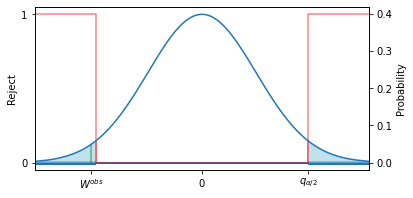

In [209]:
fig, ax = plt.subplots(figsize=(6,3))
xmin=norm.ppf(0.001)
xmax=norm.ppf(0.999)
ax.set_xlim(xmin,xmax)

plt.yticks(ticks=[0,1])
ax.set_ylabel("Reject")

# name some important points on the line
q_a = norm.ppf(0.975) # 5% level, two sided
w_obs = -2.04

# the fail to reject portion
plt.hlines(0,-q_a, q_a, lw=2)
# make rejection region line heavier weight
plt.hlines(0, xmin, -q_a, lw=4)
plt.hlines(0,q_a, xmax, lw=4)

# Plot our test function
ax.step([xmin,-q_a, q_a,xmax],[1,1,0,1],
        drawstyle="steps-post",
        label="$\psi(X_1,\dots,X_n, Y_1,\dots,Y_m)$", 
        alpha=0.5,
       color="red")

# plot our normal dist with different y axis
# x values for the normal plot.
ax2 = ax.twinx()
x = np.linspace(xmin, xmax, 201)
ax2.plot(x, norm.pdf(x), label=('$\mathcal{N}(0,1)$'))
ax2.set_ylabel("Probability")

# mark the rejection region
ax2.vlines(x=[-q_a,q_a], ymin=[0,0], ymax=[norm.pdf(-q_a),norm.pdf(q_a)], color='red', alpha=0.5)
# shade the rejection region
x_left=np.linspace(xmin,-q_a,201)
x_right=np.linspace(q_a,xmax,201)
ax2.fill_between(x_left, norm.pdf(x_left), alpha=0.75, facecolor='lightblue')
ax2.fill_between(x_right, norm.pdf(x_right), alpha=0.75, facecolor='lightblue')

# mark where our observed statistic lies.
ax2.vlines(x=[w_obs], ymin=[0], ymax=[norm.pdf(w_obs)], color='green', alpha=0.5)
# hatch the p-value
#x_hatch=np.linspace(w_observed,xmax,201)
#ax2.fill_between(x_hatch, norm.pdf(x_hatch),alpha=0.75, facecolor='lightblue', hatch='///')

plt.xticks(ticks=[0,alpha, w_obs],labels=[r'$0$',r'$q_{\alpha/2}$',r"$W^{obs}$"])


plt.show()

We have a bit more information than this though.  What is the p-value for this test?  We want to compute the area of the hatched section(s):

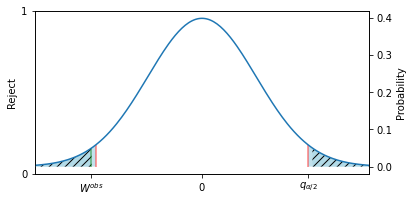

p-value: 0.0414 is equal to the area of the parts indicated with a hashed background


In [233]:
fig, ax = plt.subplots(figsize=(6,3))
xmin=norm.ppf(0.001)
xmax=norm.ppf(0.999)
ax.set_xlim(xmin,xmax)

plt.yticks(ticks=[0,1])
ax.set_ylabel("Reject")

# name some important points on the line
q_a = norm.ppf(0.975) # 5% level, two sided
w_obs = -2.04

# the fail to reject portion
#plt.hlines(0,-q_a, q_a, lw=2)
# make rejection region line heavier weight
#plt.hlines(0, xmin, -q_a, lw=4)
#plt.hlines(0,q_a, xmax, lw=4)

# Plot our test function
#ax.step([xmin,-q_a, q_a,xmax],[1,1,0,1],
#        drawstyle="steps-post",
#        label="$\psi(X_1,\dots,X_n, Y_1,\dots,Y_m)$", 
#        alpha=0.5,
#       color="red")

# plot our normal dist with different y axis
# x values for the normal plot.
ax2 = ax.twinx()
x = np.linspace(xmin, xmax, 201)
ax2.plot(x, norm.pdf(x), label=('$\mathcal{N}(0,1)$'))
ax2.set_ylabel("Probability")

# mark the rejection region
ax2.vlines(x=[-q_a,q_a], ymin=[0,0], ymax=[norm.pdf(-q_a),norm.pdf(q_a)], color='red', alpha=0.5)
# shade the rejection region
x_left=np.linspace(xmin,-q_a,201)
x_right=np.linspace(q_a,xmax,201)
ax2.fill_between(x_left, norm.pdf(x_left), alpha=0.75, facecolor='lightblue')
ax2.fill_between(x_right, norm.pdf(x_right), alpha=0.75, facecolor='lightblue')

# mark where our observed statistic lies.
ax2.vlines(x=[w_obs], ymin=[0], ymax=[norm.pdf(w_obs)], color='green', alpha=0.5)

# hatch the p-value
x_hatch_left = np.linspace(xmin, w_obs,201)
x_hatch_right = np.linspace(-w_obs,xmax,201)
ax2.fill_between(x_hatch_left, norm.pdf(x_hatch_left),alpha=0.75, facecolor='lightblue', hatch='///')
ax2.fill_between(x_hatch_right, norm.pdf(x_hatch_right),alpha=0.75, facecolor='lightblue', hatch='///')

plt.xticks(ticks=[0,alpha, w_obs],labels=[r'$0$',r'$q_{\alpha/2}$',r"$W^{obs}$"])
plt.show()
p_value = 2*(norm.cdf(w_obs))
print(f'p-value: %.4f is equal to the area of the parts indicated with a hashed background' %p_value)

So with a p-value of 0.0414 we see that we have strong evidence that the R2F method is in fact the faster boarding method on average.  We should be a bit careful here though.  The p-value is very close to the level of our test which means that we would fail to reject the null hypothesis if we asked for the level of the test to be just slightly lower.  For example if we had a level of 4%, then we would fail to reject the null hypothesis.

#### Example 3:  Waiting times.

The set up here is we have samples that are from an exponential distribution with parameter $\lambda$.  They represent a waiting time.  We assume that the observations are independent and all from the same distribution.  So we have $X_1,\dots,X_n \overset{\text{iid}}{\sim}\text{Exp}(\lambda)$.  Suppose that we want to test if the waiting time is less than or greater than one minute.  We set up our hypothesis this way:

$$H_0: \lambda \ge 1$$
$$H_1: \lambda \lt 1$$

So what are these saying?  The null hypothesis is that $\lambda \ge 1$ so that is saying that the waiting time is less than 1 (minute), and the alternate hypothesis is that the waiting time is longer than 1 (minute) (since the waiting time is $1/\lambda$).

Recall that by using the Delta-method we were able to show that an unbiased estimator for $\lambda$ was given by $\hat{\lambda} = 1/\bar{X}_n$.  Also we showed that we have the following asymptotic normality

$$\sqrt{n}(\hat{\lambda} - \lambda) \overset{\text{(d)}}{\underset{n \to \infty}{\longrightarrow}}\mathcal{N}(0,\lambda^2)$$

But this is not quite what we want yet to apply the Wald test. We need to have something that converges to $\mathcal{N}(0,1)$ and to get that we would have to divide both sides by $\lambda$, and even then we have an unknown value $\lambda$. The usual trick is to use an estimator and then apply Slutsky's.

$$\sqrt{n}\frac{\hat{\lambda} - \lambda}{\hat{\lambda}}$$

Which is close to what we need, but we need to make sure that we are setting up the test to be as conservative as possible about rejecting the null hypothesis.  So what value should $\lambda$ have in order to ensure that we make as few type 1 errors as possible? Since this is a one sided test we can take our cutoff parameter to be the smallest value that $\lambda$ can take under the null hypothesis. The values that $\lambda$ can take are $\lambda \ge 1$ so that means if we take on the edge case value $1$.

#### asside 
One way to reason about what value of $\lambda$ to use is to consider how the test statistic is created.  $W$ is created by looking at the mean value that our data takes, $\hat{\lambda}$, then centering that data by subtracting a value that the true parameter could take under the null hypothesis, $\hat{\lambda} - \lambda$,  and rescaling that difference by the standard deviation in our data, $\sqrt{\widehat{\text{var}}(\hat{\lambda})}$. We want to choose the value that the true parameter could take under the null hypothesis in such a way that we are least likely to reject the null hypothesis on any possible data that we might see. That is we want to choose a value for $\lambda$ in our null hypothesis region so that no matter what data we see we have the lowest probability of rejecting the null hypothesis.  That is what it means to be conservative, and is the content of the Neyman-Pearson appoach.  We want to give as much advantage as possible to the null hypothesis and in doing so we will be sure that any data we see that suggests rejecting the null hypothesis will also reject the null hypothesis for any value of $\lambda$ in the null hpothesis region.

So in our current example consider what happens if our data suggests that our true parameter is less than 1.  If we use a $\lambda$ value that is larger than 1 as the centre for our statistic then any data that we get will be more surprising than seeing the same data when the centre of our normal distribution is 1.  Or, given any data that we see in the rejection region, the least surprising result will be when we compare that data with the value of $\lambda=1$.  If $\lambda$ is greater than $1$ then the same data will be more surprising, so we will be more temped to reject the null hypothesis by that same data.

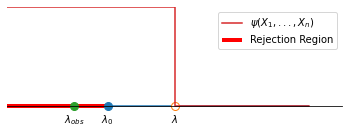

In [337]:
# set up the figure
fig, ax = plt.subplots(figsize=(6,2))
ax.set_xlim(0,10)
ax.set_ylim(-0.1,1)

# name some important points on the line
xmin,xmax = 0, 9
ms= 8
la, la_0, la_obs = 5, 3, 2

# the fail to reject portion
plt.hlines(0, la_0, xmax)
#plt.plot(theta_0 - c,y, 'o', ms=10, mfc="w")

# make rejection region line heavier weight
plt.hlines(0,xmin, theta_0, lw=4,color="red",  label="Rejection Region")

# label our parameter la_0, la, and la_obs 
plt.plot(la_0,0,'o',ms=ms)
plt.plot(la,0, 'o', ms=ms, mfc="w")
plt.plot(la_obs, 0, 'o', ms=ms)
#plt.text(la, y-0.35, r'$\lambda$', fontsize=14)
#plt.text(la_0, y-0.35, r'$\lambda_0=1$', fontsize=14)
#plt.text(theta_0+3,0.75,"$\psi$")

# Plot our test function
x=[1,1,1,1,1,0,0,0,0,0]
plt.plot(x,drawstyle="steps-post",label="$\psi(X_1,...,X_n)$")
plt.xticks(ticks=[la_obs,la_0, la],labels=[r'$\lambda_{obs}$',r'$\lambda_0$',r"$\lambda$"])
plt.plot
plt.legend()
ax.get_yaxis().set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines[["top", "left", "right"]].set_visible(False)
ax.spines["bottom"].set_position('zero')
plt.show()

#### back to our example

We thus take $\lambda = 1$ when we build our $W$ statistic.

$$
W=\sqrt{n}\frac{\hat{\lambda} - 1}{\hat{\lambda}} \overset{\text{(d)}}{\underset{n \to \infty}{\longrightarrow}}\mathcal{N}(0,1)
$$

So when will we reject the null hypothesis?  The alternative hypothesis is that $\lambda$ is less than 1.  If our data indicates that $\lambda$ is small then that means that $\hat{\lambda}$ will be small.  That makes the second factor in our test statistic negative and small, so that means we should reject the null hypothesis if our statistic is small.  How small?  If we are testing at a 5% level, then we should reject in the case that
$$W \lt -q_\alpha$$ where $\alpha$ is the level of our test.  The picture of this is below.

Text(0, 0.5, 'Probability')

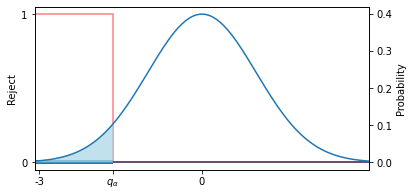

In [257]:
from scipy.stats import expon
fig, ax = plt.subplots(figsize=(6,3))
xmin=norm.ppf(0.001)
xmax=norm.ppf(0.999)
q_a = -norm.ppf(0.05) # 5% one sided test
ax.set_xlim(xmin,xmax)

plt.yticks(ticks=[0,1])
ax.set_ylabel("Reject")

# the reject portion
plt.hlines(0,xmin, -q_a, lw=4)
# make rejection region line heavier weight
plt.hlines(0,-q_a,xmax, lw=2)

# Plot our test function
ax.step([xmin,-q_a,xmax],[1,1,0],
        drawstyle="steps-post",
        label="$\psi(X_1,\dots,X_n, Y_1,\dots,Y_m)$", 
        alpha=0.5,
       color="red")

# plot our exponential dist with different y axis
# x values for the normal plot.
ax2 = ax.twinx()
x = np.linspace(xmin, xmax, 201)
ax2.plot(x, norm.pdf(x), label=('$\mathcal{N}(0,1)$'))

# shade the rejection region
x_left=np.linspace(xmin,-q_a,201)
ax2.fill_between(x_left, norm.pdf(x_left), alpha=0.75, facecolor='lightblue')

plt.xticks(ticks=[-3,-q_a,0],labels=["-3",'$q_\\alpha$',0])

ax2.set_ylabel("Probability")


### Example 4: The Maximum Likelihood Estimator and the Wald test

Recall that if we have a function that is sufficiently differentiable and continuous that we have that the Maximum Likelihood Estimator satisfies

$$\sqrt{n}(\hat{\theta}^{\text{MLE}}-\theta) \overset{\text{(d)}}{\underset{n \to \infty}{\longrightarrow}}\mathcal{N}(0,\frac{1}{I(\theta)})$$

Where $I(\theta)$ is the Fisher information.  So using the example above as a guide if we multiply both sides by the square root of the Fisher information we get

$$\sqrt{n I(\theta)}(\hat{\theta}^{\text{MLE}}-\theta) \overset{\text{(d)}}{\underset{n \to \infty}{\longrightarrow}}\mathcal{N}(0,1)$$

But we are not quite there yet.  Notice that the Fisher information depends on our unkown parameter $\theta$. We need an estimator for $\theta$.  If we assume that the Fisher information is a continuous function of $\theta$ ( which we get from the regularity assumptions that allowed us to compute the MLE ) then we can use the continuous mapping theorem and Slutsky's to justify replacing $\theta$ with $\hat{\theta}^{\text{MLE}}$ to get

$$\sqrt{n I(\hat{\theta}^{\text{MLE}})}(\hat{\theta}^{\text{MLE}}-\theta) \overset{\text{(d)}}{\underset{n \to \infty}{\longrightarrow}}\mathcal{N}(0,1)$$

And now we can use the Wald test with the test statistic

$$W = \sqrt{n I(\hat{\theta}^{\text{MLE}})}(\hat{\theta}^{\text{MLE}}-\theta)$$

So if we have a two sided test then we can use the test $\psi=\mathbb{1}\{|W|\gt q_{\alpha/2}\}$ or in the case of one sided tests, $\psi=\mathbb{1}\{ W \gt q_\alpha\}$ or $\psi=\mathbb{1}\{ W \lt q_\alpha\}$.


Example: Suppose that we have observations independently drawn from a [Pareto distribution](https://en.wikipedia.org/wiki/Pareto_distribution) with parameter $\theta$, $X_1,\dots,X_n \overset{\text{iid}}{\sim} \sqrt{\theta}x^{\sqrt{\theta}-1}\mathbb{1}(0\le x\le 1)$.  Suppose that we have $n=67$ observations, and those observations have a geometric average equal to 

$$\left(\prod_{i=1}^{67}X_i\right)^{\frac{1}{67}}=0.362$$

a) find the Maximum Likelihood Estimator $\hat{\theta}$ of $\theta$.

The likelihood is given by

$$
L(X_1,\dots,X_n;\theta)=L_n(\theta)=\prod_{i=1}^n\sqrt{\theta}X_i^{\sqrt{\theta}-1}
$$

Since $\theta$ does not vary with $i$ we can move those factors outside the product to get

$$
L_n(\theta)= \theta^{n/2}\left( \prod_{i=1}^n X_i\right)^{\sqrt{\theta}-1}
$$

Then the log likelihood is

$$
\ell(\theta) = \frac{n}{2}\ln(\theta)+ (\sqrt{\theta}-1)\sum_{i=1}^n\ln(X_i)
$$

Taking the derivative gives us

$$
\ell^\prime(\theta) = \frac{n}{2\theta} + \frac{1}{2\sqrt{\theta}}\sum_{i=1}^n\ln(X_i)
$$

First notice that since $\forall X_i, \ln(X_i) \lt 0$ because $X_i \in (0,1)$. Thus setting the derivative of the log likelihood equal to zero we get that

$$
\hat{\theta} = \left( \frac{n}{\sum_{i=1}^n \ln(X_i)}\right)^2
$$

Now that we have our estimator we can use our data. We begin by rewriting the above as

$$
\hat{\theta} = \left( \frac{\sum_{i=1}^{67} X_i}{67} \right)^{-2}
$$


Converting the geometric mean to the arithmetic mean gives us this relation. 

$$
\left( \prod_{i=1}^{67} X_i\right) = \exp(\frac{\sum_{i=1}^{67}X_i}{67})=0.362
$$

Thus

$$
\ln(0.362)=\frac{\sum_{i=1}^{67}X_i}{67}
$$

Thus we get that $\hat{\theta} = (\ln{0.362})^{-2} = 0.9685$

b) Compute the Fisher Information.

From above we have that the first derivative of the log likelihood for $n=1$ is given by

$$
\ell^\prime(\theta) = \frac{1}{2\theta} + \frac{1}{2\sqrt{\theta}}\ln(X_1)
$$

So taking the derivative with respect to $\theta$ gives us

$$
\ell^{\prime\prime}(\theta)=-\frac{1}{2\theta^2} -\frac{1}{4}\theta^{-3/2}\ln(X_1)
$$

c) we want to test the hypotheses:

$$
H_0: \theta = 1\\
H_1: \theta \ne 1
$$

What is the asymptotic p-value of the Wald test statistic given in terms of the Fisher Information.
